**Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

**Read the dataset**

In [2]:
d=pd.read_csv('drug.csv')

In [3]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Data Exploration**

In [4]:
d.shape

(200, 6)

In [5]:
d.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
d.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
d.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [9]:
d.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
80,60,M,HIGH,HIGH,13.934,drugB
33,65,F,HIGH,NORMAL,31.876,drugY
102,28,F,LOW,HIGH,13.127,drugC
74,31,M,HIGH,NORMAL,17.069,drugY
57,40,M,HIGH,HIGH,27.826,drugY


In [10]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [11]:
d["Sex"]=d["Sex"].replace({"M":1,"F":0})

In [12]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [13]:
d["BP"]=d["BP"].replace({"HIGH":3,"NORMAL":2,"LOW":1})

In [14]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,HIGH,25.355,drugY
1,47,1,1,HIGH,13.093,drugC
2,47,1,1,HIGH,10.114,drugC
3,28,0,2,HIGH,7.798,drugX
4,61,0,1,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,HIGH,11.567,drugC
196,16,1,1,HIGH,12.006,drugC
197,52,1,2,HIGH,9.894,drugX
198,23,1,2,NORMAL,14.020,drugX


In [16]:
d["Cholesterol"]=d["Cholesterol"].replace({"HIGH":3,"NORMAL":2,"LOW":1})

In [17]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,3,25.355,drugY
1,47,1,1,3,13.093,drugC
2,47,1,1,3,10.114,drugC
3,28,0,2,3,7.798,drugX
4,61,0,1,3,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,3,11.567,drugC
196,16,1,1,3,12.006,drugC
197,52,1,2,3,9.894,drugX
198,23,1,2,2,14.020,drugX


In [18]:
d.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

**Machine Learning**

In [19]:
x=d.drop(["Drug"],axis=1)

In [20]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,3,3,25.355
1,47,1,1,3,13.093
2,47,1,1,3,10.114
3,28,0,2,3,7.798
4,61,0,1,3,18.043
...,...,...,...,...,...
195,56,0,1,3,11.567
196,16,1,1,3,12.006
197,52,1,2,3,9.894
198,23,1,2,2,14.020


In [21]:
y=d.Drug

In [23]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=4)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model=DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(x_train,y_train)

1.0

In [30]:
model.score(x_test,y_test)

0.96

In [31]:
y_predict=model.predict(x_test)

In [32]:
y_predict

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY'], dtype=object)

In [33]:
e=pd.DataFrame({'Actual':y_test,"predicted":y_predict})

In [34]:
e

,Actual,predicted
11,drugY,drugY
99,drugY,drugY
128,drugY,drugY
175,drugY,drugY
1,drugC,drugC
111,drugX,drugX
90,drugY,drugY
177,drugY,drugY
88,drugY,drugY
187,drugA,drugA


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
performance=confusion_matrix(y_test,y_predict)

In [37]:
performance

array([[ 6,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 11,  1],
       [ 0,  0,  0,  0, 23]], dtype=int64)

In [38]:
from sklearn.metrics import plot_confusion_matrix

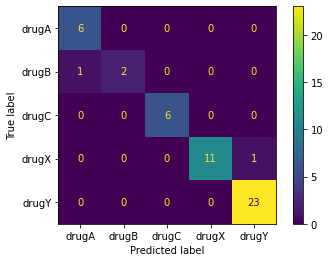

In [39]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [40]:
from sklearn.metrics import classification_report

In [41]:
performance_report=classification_report(y_test,y_predict)

In [42]:
performance_report

'              precision    recall  f1-score   support\n\n       drugA       0.86      1.00      0.92         6\n       drugB       1.00      0.67      0.80         3\n       drugC       1.00      1.00      1.00         6\n       drugX       1.00      0.92      0.96        12\n       drugY       0.96      1.00      0.98        23\n\n    accuracy                           0.96        50\n   macro avg       0.96      0.92      0.93        50\nweighted avg       0.96      0.96      0.96        50\n'

In [43]:
p=pd.crosstab(e["Actual"],e["predicted"],rownames=["Actual"],colnames=["predicted"])

In [44]:
p

predicted,drugA,drugB,drugC,drugX,drugY
Actual,,,,,
drugA,6,0,0,0,0
drugB,1,2,0,0,0
drugC,0,0,6,0,0
drugX,0,0,0,11,1
drugY,0,0,0,0,23


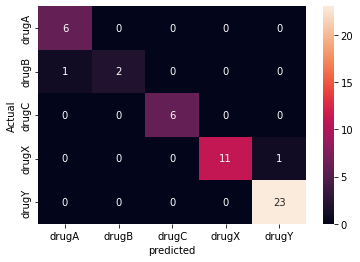

In [45]:
sns.heatmap(p,annot=True)
plt.show()

In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [47]:
f = ["Age","Sex","BP","Cholesterol","Na_to_K"]

In [48]:
g = ["drugA","drugB","drugC","drugX","drugY"]

In [49]:
from sklearn import tree

[Text(465.0, 611.55, 'Na_to_K <= 14.627\ngini = 0.691\nsamples = 150\nvalue = [17, 13, 10, 42, 68]\nclass = drugY'),
 Text(387.5, 475.65, 'BP <= 2.5\ngini = 0.655\nsamples = 82\nvalue = [17, 13, 10, 42, 0]\nclass = drugX'),
 Text(232.5, 339.75, 'BP <= 1.5\ngini = 0.311\nsamples = 52\nvalue = [0, 0, 10, 42, 0]\nclass = drugX'),
 Text(155.0, 203.84999999999997, 'Cholesterol <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [0, 0, 10, 14, 0]\nclass = drugX'),
 Text(77.5, 67.94999999999993, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0]\nclass = drugX'),
 Text(232.5, 67.94999999999993, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]\nclass = drugC'),
 Text(310.0, 203.84999999999997, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]\nclass = drugX'),
 Text(542.5, 339.75, 'Age <= 52.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugA'),
 Text(465.0, 203.84999999999997, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]\nclass = drugA'),
 Text(620.0, 203.849999999999

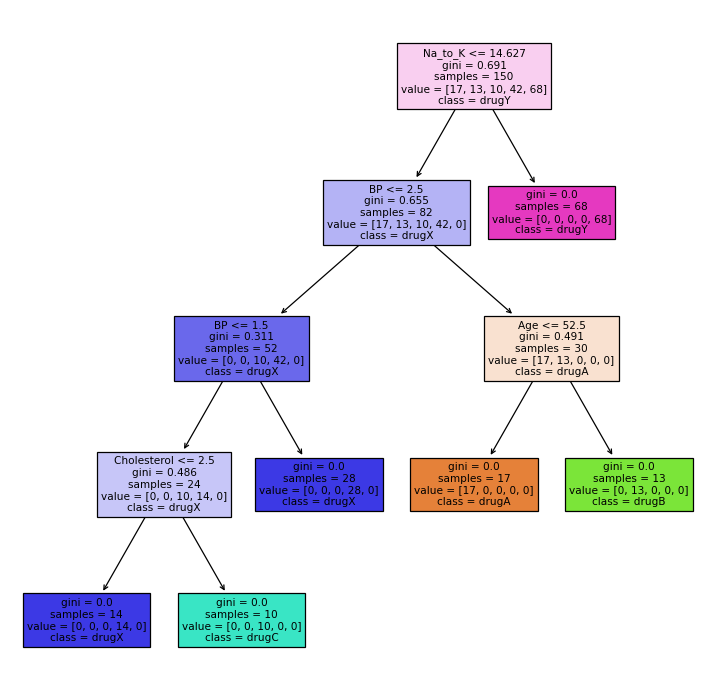

In [51]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=90,facecolor='white')
tree.plot_tree(model,feature_names=f,class_names=g,filled=True)